# CAPSTONE - Electricity
    

In [107]:

#let's import below packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from datetime import datetime

In [108]:
# First let's find current Directory:
os.getcwd()

'/Users/markoglodovic/Documents/Springboard_projects/Electricity'

In [109]:
# Changing the directory:
os.chdir(r'/Users/markoglodovic/Documents/Springboard_projects/Electricity')

In [110]:
os.getcwd()

'/Users/markoglodovic/Documents/Springboard_projects/Electricity'

## The Data wrangling step focuses on collecting our data, organizing it, and making sure it's well defined. For our project we have collected below dataset to have a good foundation to build a Machine Learning model where we can provide a good estimate of future tendecies regarding electricity needs in USA and CANADA.

In [111]:
df = pd.read_csv('/Users/markoglodovic/Downloads/electricity-exports-and-imports-monthly.csv',    encoding='latin-1')

We will need to Clean NANs, duplicate values, wrong values and removing insignificant columns.


In [112]:
# lets check the Dataframe we got
df.head()

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,01/01/1990,Exports,British Columbia,Alaska,75.196,4536.00,60.32
1,01/01/1990,Exports,British Columbia,California,345904.000,11144596.03,32.22
2,01/01/1990,Exports,British Columbia,Oregon,148800.000,4770498.00,32.06
3,01/01/1990,Exports,British Columbia,Total,496761.596,16000590.03,32.21
4,01/01/1990,Exports,British Columbia,Washington,1982.400,80960.00,40.84


In [113]:
# let's check the data types in the df:
df.dtypes

Period                 object
Activity               object
Source                 object
Destination            object
Energy (MW.h)         float64
Total Value (CAN$)    float64
Price (CAN$/MW.h)      object
dtype: object

#### So the data types need to be changed 

In [114]:
# let's change 'Perid' data type from 'object' to 'datetime':
df['Period']=pd.to_datetime(df['Period'])

In [115]:
# second we need to change 'Price' data type from 'object' to 'float64'
df['Price (CAN$/MW.h)'] = df['Price (CAN$/MW.h)'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [116]:
# let's check the data types in the df:
df.dtypes

Period                datetime64[ns]
Activity                      object
Source                        object
Destination                   object
Energy (MW.h)                float64
Total Value (CAN$)           float64
Price (CAN$/MW.h)            float64
dtype: object

### Data types are corrected

In [117]:
# let's check if we have any NANs: 
df.isnull().sum()

Period                  0
Activity                0
Source                  0
Destination             6
Energy (MW.h)           0
Total Value (CAN$)      0
Price (CAN$/MW.h)     573
dtype: int64

In [118]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Price (CAN$/MW.h),573,1.564676
Destination,6,0.016384
Period,0,0.000000
Activity,0,0.000000
Source,0,0.000000
Energy (MW.h),0,0.000000
Total Value (CAN$),0,0.000000


In [119]:
# lets change the name of columns for easier work
df=df.rename(columns = {'Price (CAN$/MW.h)':'Price','Total Value (CAN$)':'Total_Value','Energy (MW.h)':'Energy' })

In [120]:
# checking for nan values in 'Destination'
df[df['Destination'].isnull()]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
5748,1997-07-01,Exports,British Columbia,NaN,17280.0,554991.26,32.119999
5784,1997-07-01,Exports,Total,NaN,17280.0,554991.26,32.119999
5839,1997-08-01,Exports,British Columbia,NaN,20800.0,671478.60,32.279999
5878,1997-08-01,Exports,Total,NaN,20800.0,671478.60,32.279999
5936,1997-09-01,Exports,British Columbia,NaN,15350.0,501942.40,32.700001
5973,1997-09-01,Exports,Total,NaN,15350.0,501942.40,32.700001


In [121]:
# we can't find out the destination so we should drop the rows
df = df.dropna(subset=['Destination'])

In [122]:
df.isnull().sum()

Period           0
Activity         0
Source           0
Destination      0
Energy           0
Total_Value      0
Price          573
dtype: int64

In [123]:
# now lets check for 'Price' column
df[df['Price'].isnull()]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
14093,2005-05-01,Exports,Manitoba,Minn / N. Dakota,1180302.087,48985493.92,NaN
14094,2005-05-01,Exports,Manitoba,Total,1180302.087,48985493.92,NaN
14124,2005-05-01,Exports,Total,Minn / N. Dakota,1180302.087,48985493.92,NaN
14211,2005-06-01,Exports,Manitoba,Minn / N. Dakota,1180010.579,56770667.49,NaN
14212,2005-06-01,Exports,Manitoba,Total,1180010.579,56770667.49,NaN
...,...,...,...,...,...,...,...
36412,2021-02-01,Exports,Manitoba,Total,302822.557,41185178.51,NaN
36450,2021-02-01,Exports,Total,Minn / N. Dakota,305755.557,41302521.51,NaN
36530,2021-03-01,Exports,Manitoba,Minn / N. Dakota,571305.225,37367970.89,NaN
36532,2021-03-01,Exports,Manitoba,Total,571305.225,37367970.89,NaN


In [125]:
# we can find the missing price if we divide total_value with energy
df['price'] = df['Total_Value'] / df['Energy']

In [127]:
# fill up the missing values
df = df.fillna({'Price': df['price']})

In [128]:
df.isnull().sum()

Period           0
Activity         0
Source           0
Destination      0
Energy           0
Total_Value      0
Price            0
price          754
dtype: int64

In [129]:
#drop the 'price' column we dont need it anymore
df.drop('price', axis=1, inplace=True)

In [130]:
df.isnull().sum()

Period         0
Activity       0
Source         0
Destination    0
Energy         0
Total_Value    0
Price          0
dtype: int64

In [131]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price
0,1990-01-01,Exports,British Columbia,Alaska,75.196,4536.00,60.320000
1,1990-01-01,Exports,British Columbia,California,345904.000,11144596.03,32.220001
2,1990-01-01,Exports,British Columbia,Oregon,148800.000,4770498.00,32.060001
3,1990-01-01,Exports,British Columbia,Total,496761.596,16000590.03,32.209999
4,1990-01-01,Exports,British Columbia,Washington,1982.400,80960.00,40.840000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36615 entries, 0 to 36620
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Period       36615 non-null  datetime64[ns]
 1   Activity     36615 non-null  object        
 2   Source       36615 non-null  object        
 3   Destination  36615 non-null  object        
 4   Energy       36615 non-null  float64       
 5   Total_Value  36615 non-null  float64       
 6   Price        36615 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.2+ MB


In [133]:
#check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36616    False
36617    False
36618    False
36619    False
36620    False
Length: 36615, dtype: bool

In [134]:
df['Source'].unique()

array(['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario',
       'Québec', 'Total', 'Maine', 'Michigan', 'Minnesota', 'Montana',
       'New England-ISO', 'New York', 'North Dakota', 'Vermont',
       'Washington', 'Saskatchewan', 'Pennsylvania', 'Alberta', 'Idaho',
       'Nebraska', 'South Dakota', 'Texas', 'Oregon', 'Wisconsin', 'Iowa',
       'Missouri', 'Kansas', 'California', 'Minn / N. Dakota',
       'Massachusetts', 'Nova Scotia', 'Illinois', 'Ohio', 'Indiana',
       'New Jersey', 'Arizona', 'Nevada', 'New Mexico', 'Wyoming',
       'Oklahoma', 'Colorado', 'Kentucky', 'Utah', 'Connecticut',
       'Pennsylvania Jersey Maryland Power Pool',
       'Newfoundland and Labrador', 'West Virginia'], dtype=object)

In [135]:
df['Destination'].unique()

array(['Alaska', 'California', 'Oregon', 'Total', 'Washington',
       'Minnesota', 'North Dakota', 'Maine', 'Massachusetts', 'Michigan',
       'New York', 'Vermont', 'New Brunswick', 'Ontario', 'Manitoba',
       'British Columbia', 'Québec', 'Saskatchewan', 'Alberta', 'Idaho',
       'Nevada', 'Montana', 'New Hampshire', 'New England-ISO',
       'Pennsylvania', 'Arizona', 'Missouri', 'Wisconsin', 'South Dakota',
       'Texas', 'Nebraska', 'Iowa', 'Colorado', 'Kansas', 'Utah',
       'Minn / N. Dakota', 'New Mexico', 'Maryland', 'Nova Scotia',
       'Virginia', 'Wyoming', 'Ohio', 'Tennessee', 'Illinois', 'Indiana',
       'Connecticut', 'Pennsylvania Jersey Maryland Power Pool',
       'Mississippi', 'New Jersey', 'Newfoundland and Labrador',
       'Oklahoma', 'Florida'], dtype=object)

In [136]:
# we have total value that we dont need, so we will drop it
df = df[df['Source'].str.contains('Total')==False]

In [137]:
# we have total value that we dont need, so we will drop it
df = df[df['Destination'].str.contains('Total')==False]

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17569 entries, 0 to 36619
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Period       17569 non-null  datetime64[ns]
 1   Activity     17569 non-null  object        
 2   Source       17569 non-null  object        
 3   Destination  17569 non-null  object        
 4   Energy       17569 non-null  float64       
 5   Total_Value  17569 non-null  float64       
 6   Price        17569 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.1+ MB


In [198]:
df.head()

,Period,Activity,Source,Destination,Energy,Total_Value,Price
0,1990-01-01,Exports,British Columbia,Alaska,75.20,"4,536.00",60.32
1,1990-01-01,Exports,British Columbia,California,"345,904.00","11,144,596.03",32.22
2,1990-01-01,Exports,British Columbia,Oregon,"148,800.00","4,770,498.00",32.06
4,1990-01-01,Exports,British Columbia,Washington,"1,982.40","80,960.00",40.84
5,1990-01-01,Exports,Manitoba,Minnesota,"5,100.42","129,051.37",25.30


In [194]:
pd.options.display.float_format = "{:,.2f}".format

#### LETS CHECK FOR OUTLIERS

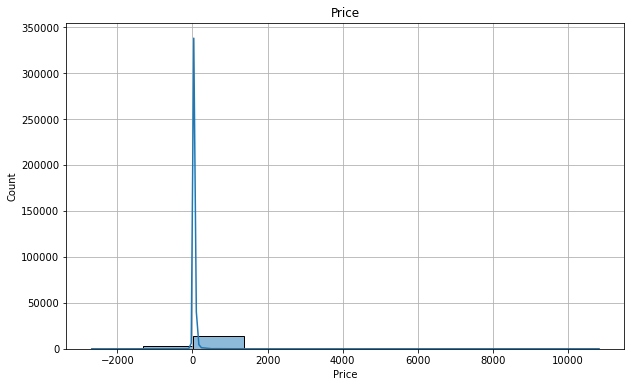

In [200]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Price'], kde=True, bins=10)
ax.set_title('Price')
plt.grid(True)

In [201]:
df.Price.sort_values(ascending=False)

11305   10,832.80
13093    3,127.99
1174     3,057.24
28134    1,624.37
9039     1,331.37
           ...   
10239     -223.09
29471     -462.32
3614      -734.18
10271   -2,220.29
10419   -2,680.20
Name: Price, Length: 17569, dtype: float64

In [203]:
df[df['Price'] > 10000 ]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
11305,2002-12-01,Imports,Maine,Québec,"1,463.00","15,848,382.71","10,832.80"


In [204]:
df[df['Price'] < 0]

,Period,Activity,Source,Destination,Energy,Total_Value,Price
3614,1994-11-01,Exports,New Brunswick,Massachusetts,50.00,"-36,709.00",-734.18
6440,1998-02-01,Imports,New England-ISO,Québec,401.00,"-26,320.80",-65.64
10164,2001-09-01,Exports,Québec,New York,"-27,885.00","10,182,372.85",-95.12
10239,2001-10-01,Exports,Québec,New York,"89,861.00","-12,452,609.22",-223.09
10271,2001-10-01,Imports,New York,Ontario,34.00,"-75,489.74","-2,220.29"
...,...,...,...,...,...,...,...
36142,2020-11-01,Imports,Nebraska,British Columbia,"6,135.00","-62,905.63",-10.25
36251,2020-12-01,Imports,Nebraska,British Columbia,"1,015.00","-5,015.74",-4.94
36490,2021-02-01,Imports,Nebraska,British Columbia,"2,108.00","-35,155.24",-16.68
36598,2021-03-01,Imports,Nebraska,British Columbia,"11,005.00","-17,042.68",-1.55


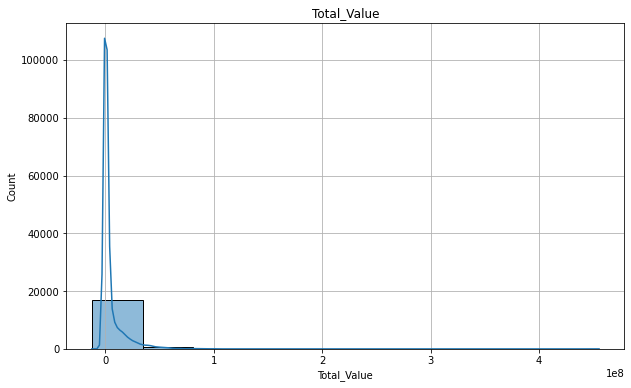

In [207]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Total_Value'], kde=True, bins=10)
ax.set_title('Total_Value')
plt.grid(True)

In [205]:
df.Total_Value.sort_values(ascending=False)

9848    455,483,705.40
9629    350,692,876.73
9777    329,827,543.69
9769    289,056,642.05
9696    285,634,746.94
             ...      
26119    -1,815,686.13
10419    -1,889,542.24
4144     -4,246,341.36
10310    -4,397,565.31
10239   -12,452,609.22
Name: Total_Value, Length: 17569, dtype: float64

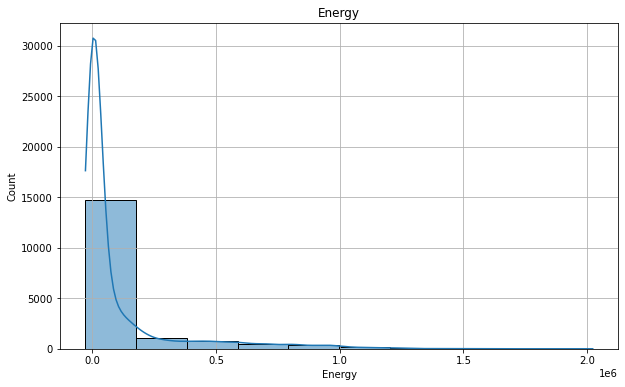

In [208]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df['Energy'], kde=True, bins=10)
ax.set_title('Energy')
plt.grid(True)

In [206]:
df.Energy.sort_values(ascending=False)

18850   2,022,303.00
10889   1,717,663.00
10962   1,538,251.00
10607   1,440,156.00
9528    1,400,401.00
            ...     
25829           0.00
29512           0.00
5257           -9.00
10163         -83.00
10164     -27,885.00
Name: Energy, Length: 17569, dtype: float64

#### Finding locations

In [212]:
a = list(df['Source'].unique())

In [213]:
print(a)

['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'New England-ISO', 'New York', 'North Dakota', 'Vermont', 'Washington', 'Saskatchewan', 'Pennsylvania', 'Alberta', 'Idaho', 'Nebraska', 'South Dakota', 'Texas', 'Oregon', 'Wisconsin', 'Iowa', 'Missouri', 'Kansas', 'California', 'Minn / N. Dakota', 'Massachusetts', 'Nova Scotia', 'Illinois', 'Ohio', 'Indiana', 'New Jersey', 'Arizona', 'Nevada', 'New Mexico', 'Wyoming', 'Oklahoma', 'Colorado', 'Kentucky', 'Utah', 'Connecticut', 'Pennsylvania Jersey Maryland Power Pool', 'Newfoundland and Labrador', 'West Virginia']


In [214]:
a.remove('Pennsylvania Jersey Maryland Power Pool')

In [215]:
from geopy.geocoders import Nominatim
latitude = []
longitude = []
for x in a:
    address= x
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    

In [216]:
print(latitude)

[55.001251, 55.001251, 46.500283, 50.000678, 52.4760892, 45.709097, 43.6211955, 45.9896587, 47.3752671, 42.18590185, 40.7127281, 47.6201461, 44.5990718, 38.8949924, 55.5321257, 40.9699889, 55.001251, 43.6447642, 41.7370229, 44.6471761, 31.8160381, 43.9792797, 44.4308975, 41.9216734, 38.7604815, 38.27312, 36.7014631, 44.666655, 42.3788774, 45.1960403, 40.0796606, 40.2253569, 40.3270127, 40.0757384, 34.395342, 39.5158825, 34.5708167, 43.1700264, 34.9550817, 38.7251776, 37.5726028, 39.4225192, 41.6500201, 53.8217327, 38.4758406]


In [217]:
b = list(df['Destination'].unique())

In [218]:
print(b)

['Alaska', 'California', 'Oregon', 'Washington', 'Minnesota', 'North Dakota', 'Maine', 'Massachusetts', 'Michigan', 'New York', 'Vermont', 'New Brunswick', 'Ontario', 'Manitoba', 'British Columbia', 'Québec', 'Saskatchewan', 'Alberta', 'Idaho', 'Nevada', 'Montana', 'New Hampshire', 'New England-ISO', 'Pennsylvania', 'Arizona', 'Missouri', 'Wisconsin', 'South Dakota', 'Texas', 'Nebraska', 'Iowa', 'Colorado', 'Kansas', 'Utah', 'Minn / N. Dakota', 'New Mexico', 'Maryland', 'Nova Scotia', 'Virginia', 'Wyoming', 'Ohio', 'Tennessee', 'Illinois', 'Indiana', 'Connecticut', 'Pennsylvania Jersey Maryland Power Pool', 'Mississippi', 'New Jersey', 'Newfoundland and Labrador', 'Oklahoma', 'Florida']


In [219]:
b.remove('Pennsylvania Jersey Maryland Power Pool')

In [220]:
for x in b:
    address= x
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    print ((x,(location.latitude, location.longitude)))

('Alaska', (64.4459613, -149.680909))
('California', (36.7014631, -118.755997))
('Oregon', (43.9792797, -120.737257))
('Washington', (38.8949924, -77.0365581))
('Minnesota', (45.9896587, -94.6113288))
('North Dakota', (47.6201461, -100.540737))
('Maine', (45.709097, -68.8590201))
('Massachusetts', (42.3788774, -72.032366))
('Michigan', (43.6211955, -84.6824346))
('New York', (40.7127281, -74.0060152))
('Vermont', (44.5990718, -72.5002608))
('New Brunswick', (46.500283, -66.750183))
('Ontario', (50.000678, -86.000977))
('Manitoba', (55.001251, -97.001038))
('British Columbia', (55.001251, -125.002441))
('Québec', (52.4760892, -71.8258668))
('Saskatchewan', (55.5321257, -106.1412243))
('Alberta', (55.001251, -115.002136))
('Idaho', (43.6447642, -114.015407))
('Nevada', (39.5158825, -116.8537227))
('Montana', (47.3752671, -109.638757))
('New Hampshire', (43.4849133, -71.6553992))
('New England-ISO', (42.18590185, -72.63837929597904))
('Pennsylvania', (40.9699889, -77.7278831))
('Arizona',

### Lets do more visualizations

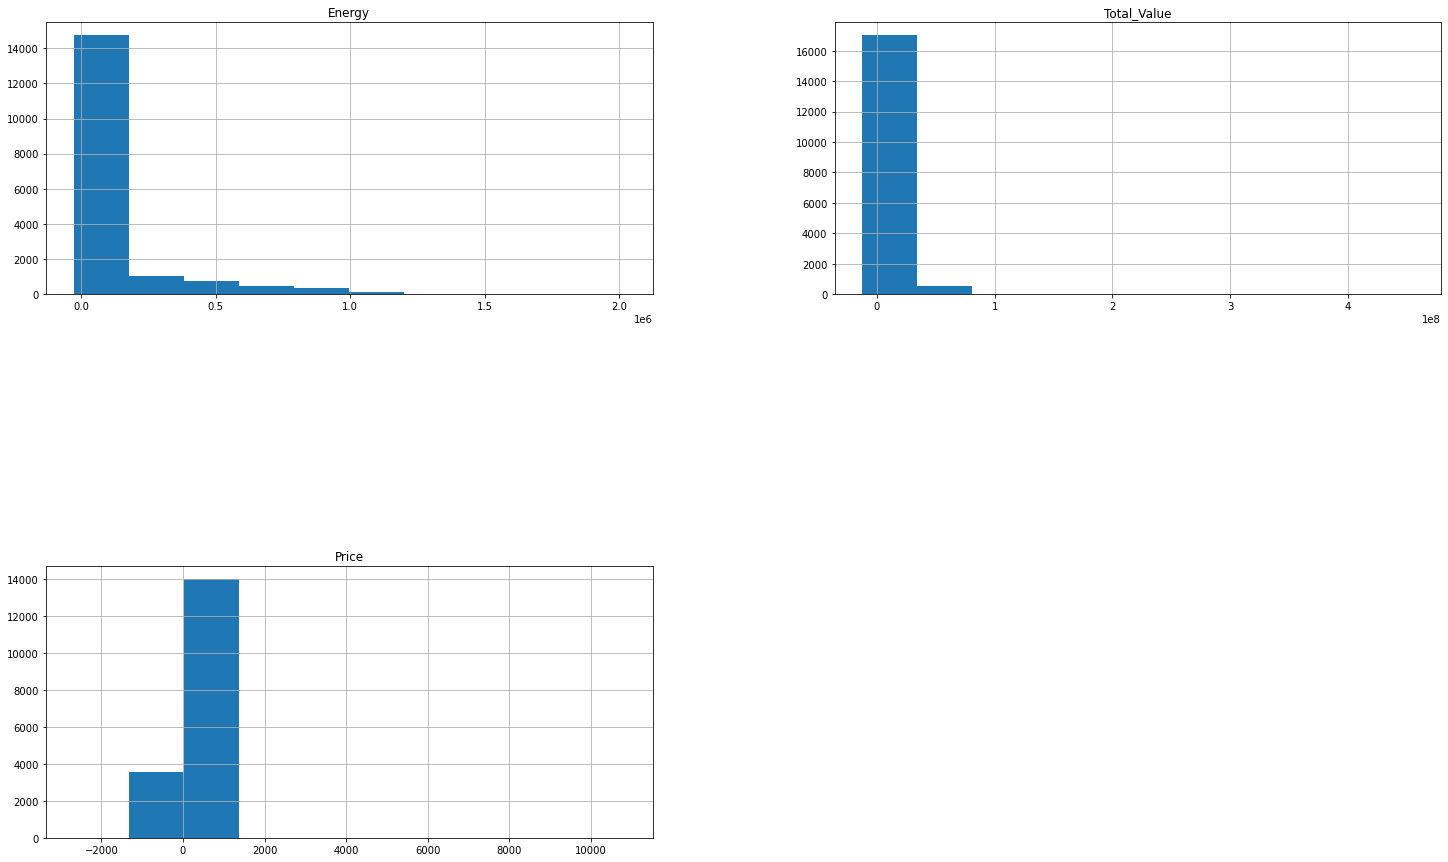

In [221]:
df.hist(figsize=(25, 15))
plt.subplots_adjust(hspace=1)

In [256]:
# Total value of electricity by years
df[['Period', 'Total_Value']].groupby(df['Period'].dt.year).sum()

,Total_Value
Period,
1990,"1,135,286,632.69"
1991,"634,269,884.98"
1992,"775,109,459.25"
1993,"942,505,248.94"
1994,"1,372,486,697.45"
1995,"1,262,512,498.06"
1996,"1,326,285,752.30"
1997,"1,588,743,663.34"
1998,"1,919,046,054.72"


<AxesSubplot:xlabel='Period'>

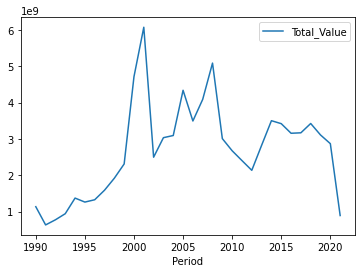

In [229]:
df[['Period', 'Total_Value']].groupby(df['Period'].dt.year).sum().plot()

In [240]:
# lets see separate values for import and export by year
df[['Period', 'Total_Value', 'Activity']].groupby([df['Period'].dt.year,'Activity']).sum()

Total_Value
Period Activity                 
1990   Exports    579,385,661.89
       Imports    555,900,970.80
1991   Exports    559,123,646.10
       Imports     75,146,238.88
1992   Exports    697,908,632.63
...                          ...
2019   Imports    591,510,338.10
2020   Exports  2,575,793,297.61
       Imports    293,457,987.28
2021   Exports    749,636,391.92
       Imports    142,741,676.18

[64 rows x 1 columns]

In [246]:
di = df[df['Activity']=='Imports']
de = df[df['Activity']=='Exports']

In [248]:
di[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum()


,Total_Value
Period,
1990,"555,900,970.80"
1991,"75,146,238.88"
1992,"77,200,826.62"
1993,"84,778,477.38"
1994,"43,863,619.78"
1995,"77,764,117.65"
1996,"108,116,524.35"
1997,"212,457,572.31"
1998,"313,192,559.35"


In [254]:
de[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum()

,Total_Value
Period,
1990,"579,385,661.89"
1991,"559,123,646.10"
1992,"697,908,632.63"
1993,"857,726,771.56"
1994,"1,328,623,077.67"
1995,"1,184,748,380.41"
1996,"1,218,169,227.95"
1997,"1,376,286,091.03"
1998,"1,605,853,495.37"


<AxesSubplot:xlabel='Period', ylabel='Export'>

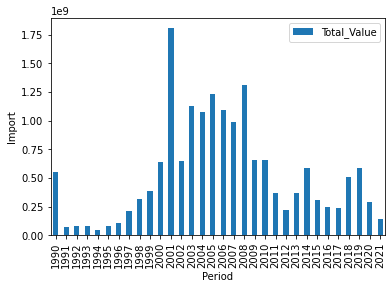

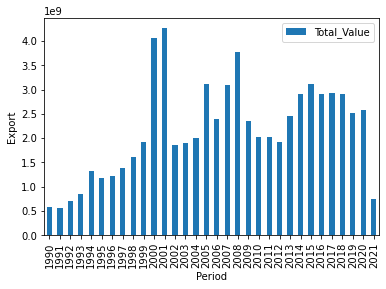

In [253]:
di[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum().plot(kind='bar',ylabel='Import')
de[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).sum().plot(kind='bar', ylabel='Export')




<AxesSubplot:xlabel='Period', ylabel='Export'>

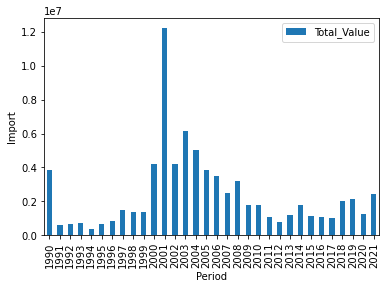

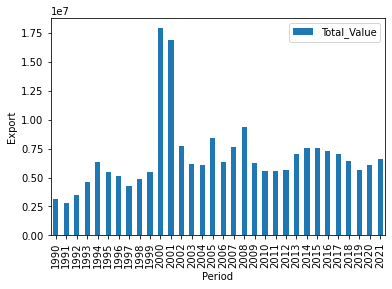

In [255]:
#average value by year
di[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='bar',ylabel='Import')
de[['Period', 'Total_Value', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='bar', ylabel='Export')



<AxesSubplot:xlabel='Period', ylabel='Export'>

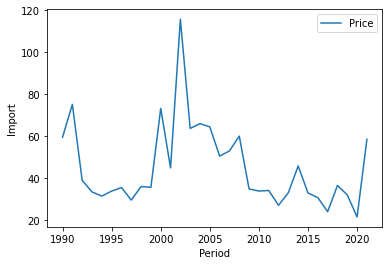

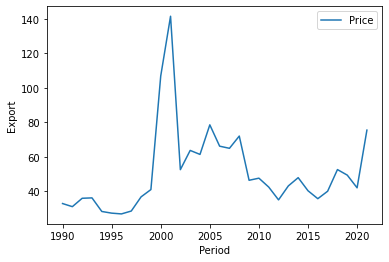

In [257]:
#average price by yeAR
di[['Period', 'Price', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='line',ylabel='Import')
de[['Period', 'Price', 'Activity']].groupby(df['Period'].dt.year).mean().plot(kind='line', ylabel='Export')